# Data Discovery — Joe Tang

### Initial setup and file cleaning

In [1]:
#necessary libraries and modules to import

import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [2]:
#importing batch data using os

csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\rt.movie_info.csv.gz',
 './zippedData\\rt.reviews.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [3]:
# cleaning the filenames

csv_files_dict = {} #create a dictionary of datasets
for filename in csv_files: #create a for loop to batch clean files
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") #remove .csv file extensions
    filename_df = pd.read_csv(filename, index_col=0, encoding='utf-8') 
    csv_files_dict[filename_cleaned] = filename_df #load .csv file as dataframe using col 1 as index and encode in utf-8 and save as the cleaned filename

# The Numbers - Movie Budgets: Top 5 Grossing Films

## Initial look at the dataset

In [4]:
movie_budgets_df = csv_files_dict['tn_movie_budgets_gz'] #set new dataset variable

In [5]:
type(movie_budgets_df) #call type of variable

pandas.core.frame.DataFrame

In [6]:
movie_budgets_df.shape #return the dimensions of the dataframe array

(5782, 5)

In [7]:
movie_budgets_df.head(10) #return the top 10 rows

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


In [8]:
movie_budgets_df[movie_budgets_df['movie'] == 'Avatar'] #return the row containing 'Avatar' in col title 'movie'

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


In [9]:
movie_budgets_df.info() #return basic summary of dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 271.0+ KB


In [10]:
movie_budgets_df.isna().sum() #sum of all the NaN values in each col

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## Data Cleaning

In [11]:
#define function called convert_amt_to_int
#cast datatype of col as string [added to avoid error], remove $, and change datatype to int64

def convert_amt_to_int(df, col):
    df[col] = df[col].astype('str').str.replace("$", "").str.replace(",", "").astype('int64') 
    return df

In [12]:
#make a list of cols to batch-change datatype with a for loop

money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols: 
    movie_budgets_df = convert_amt_to_int(movie_budgets_df, col)

In [13]:
movie_budgets_df.info() #return basic summary of dataframe to confirm datatype changes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [14]:
#re-confirm no NaN values

movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

## Exploratory Data Analysis

### Looking at the value count

In [15]:
#looking at the most occuring values to see if there are any weird values
#using a for loop, returning normalized values (values as a percentage of the total values) in the first 5 rows  

for col in movie_budgets_df:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{movie_budgets_df[col].value_counts(normalize = True)[:5]}')
    print("-------------------")

Viewing values in col: release_date
Top 5 values:
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2013    0.002248
Name: release_date, dtype: float64
-------------------
Viewing values in col: movie
Top 5 values:
King Kong       0.000519
Halloween       0.000519
Home            0.000519
Venom           0.000346
Pet Sematary    0.000346
Name: movie, dtype: float64
-------------------
Viewing values in col: production_budget
Top 5 values:
20000000    0.039952
10000000    0.036666
30000000    0.030612
15000000    0.029920
25000000    0.029575
Name: production_budget, dtype: float64
-------------------
Viewing values in col: domestic_gross
Top 5 values:
0           0.094777
8000000     0.001557
2000000     0.001211
7000000     0.001211
10000000    0.001038
Name: domestic_gross, dtype: float64
-------------------
Viewing values in col: worldwide_gross
Top 5 values:
0          0.063473
8000000    0.001557
7000000    0.001038
2000000

Now that we know our dataframe has clean data, we can start working on the logic needed to get the top 5 grossing movies. As we have the production budget available, we can create a new column which will have the profits the movie has made.

### Looking at the Top 5 Grossing Films

#### Create a new column looking at Worldwide Gross vs. Production Budget

In [16]:
#add a new column 'budget_gross_diff' by subtracting 'production_budget' from 'worldwide_gross' cols 

movie_budgets_df['budget_gross_diff'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']

movie_budgets_df.head() #call first 5 rows

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


### Looking at only the Top 50 Movies

In [17]:
#set new variable for the top 50 movies by production budget
movie_budgets_df_top50 = movie_budgets_df[:50]

In [18]:
movie_budgets_df_top50 #return Top 50 movies

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425
9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209


### Adding IMDB Title Basics dataset to Top 50 Movies for Genre details

In [19]:
#set new dataframe from the imdb title basics dataset
imdb_title_basics_df = csv_files_dict['imdb_title_basics_gz']

In [20]:
imdb_title_basics_df.head() #call first 5 rows

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [21]:
#using .merge and a left join since there are different col names, and setting left_on and right_on 

movie_details_df = pd.merge(movie_budgets_df_top50, imdb_title_basics_df, left_on=  ['movie'],
                   right_on= ['primary_title'], 
                   how = 'left')

In [22]:
movie_details_df.shape #return dimensions of new array

(55, 11)

In [23]:
movie_details_df.info() # return basic summary of new dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 11 columns):
release_date         55 non-null object
movie                55 non-null object
production_budget    55 non-null int64
domestic_gross       55 non-null int64
worldwide_gross      55 non-null int64
budget_gross_diff    55 non-null int64
primary_title        41 non-null object
original_title       41 non-null object
start_year           41 non-null float64
runtime_minutes      38 non-null float64
genres               40 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 5.2+ KB


In [24]:
movie_details_df.dropna(inplace = True) #remove rows with missing values in place/within the original dataframe

In [25]:
movie_details_df.shape #return dimension of array

(38, 11)

Only 38 movies with all values!

In [61]:
movie_details_df.head(10) #return first 10 rows

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,primary_title,original_title,start_year,runtime_minutes,...,Thriller,Horror,Action,Western,Comedy,Sci-Fi,Drama,History,Crime,Animation
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,Avatar,Abatâ,2011.0,93.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,Dark Phoenix,2019.0,113.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,Justice League,Justice League,2017.0,120.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,Spectre,Spectre,2015.0,148.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,809439099,The Dark Knight Rises,The Dark Knight Rises,2012.0,164.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,118151347,Solo: A Star Wars Story,Solo: A Star Wars Story,2018.0,135.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,-14997885,The Lone Ranger,The Lone Ranger,2013.0,150.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Separating out Genre values

Since we have multiple strings in the Genre column, we separate out each Genre value into its own column, and set values in each column where 1 it is a move in that genre and 0 if it is not.

In [27]:
#split the genre column to individual genre columns
#use a lambda function to split the genre list at the comma

movie_details_df['genres'] = movie_details_df['genres'].apply(lambda x: x.split(",") if x else x)
movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,Avatar,Abatâ,2011.0,93.0,[Horror]
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]"
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]"
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]"
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]"


In [28]:
#create a set (unordered) of all genres (no duplicate values) using a for loop

all_genres = set()
for genres in movie_details_df['genres']: #for all genres in the move_details_df 'genres' column
    if genres: #if in genres
        all_genres.update(genres) #add to the set called all_genres

In [29]:
all_genres #call new set

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Sci-Fi',
 'Thriller',
 'Western'}

In [30]:
#add new genre cols from all_genres set and fill with zero values using numpy with a for loop; 

for genre in all_genres: #for genre in all_genres set
    movie_details_df[genre] = np.zeros(shape=movie_details_df.shape[0]) 
        #create new genre column such that it is filled with zeroes 
        #with a shape equal to first dataframe col
                                
movie_details_df.head() #return first 5 rows of dataframe

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,primary_title,original_title,start_year,runtime_minutes,...,Thriller,Horror,Action,Western,Comedy,Sci-Fi,Drama,History,Crime,Animation
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,Avatar,Abatâ,2011.0,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,Dark Phoenix,2019.0,113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#set the genre value to 1 if the film is of that genre with a nested for loop

for index, row in movie_details_df.iterrows(): #for index, row position in dataframe, iterating throw rows
    if row['genres']: #if in genres col
        for genre in row['genres']: #for genre in genres col
            movie_details_df.loc[index, genre] = 1 #set the value of each matching index/genre position to 1

movie_details_df.head() #return first 5 rows of dataframe

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,primary_title,original_title,start_year,runtime_minutes,...,Thriller,Horror,Action,Western,Comedy,Sci-Fi,Drama,History,Crime,Animation
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,Avatar,Abatâ,2011.0,93.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,Dark Phoenix,2019.0,113.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:
#drop the old genres column and set as new dataframe 

movie_details_df_modified = movie_details_df.drop(columns = 'genres')

In [40]:
#gettings counts in all the columns with a for loop

for col in movie_details_df_modified: #for col in the new dataframe
    print(f'Viewing values in col: {col}') #Print f string, using col
    print(f'Top 5 values:\n{movie_details_df_modified[col].value_counts()}') #Print f string, using unique count of values in the col
    print('--------------------------------') #spacer

Viewing values in col: release_date
Top 5 values:
May 14, 2010    4
May 1, 2015     1
May 6, 2016     1
Nov 24, 2010    1
May 25, 2012    1
Apr 14, 2017    1
Jul 3, 2012     1
Jun 15, 2018    1
Nov 17, 2017    1
May 3, 2013     1
Dec 17, 2014    1
Jun 21, 2017    1
May 18, 2012    1
Mar 9, 2012     1
Dec 14, 2012    1
May 26, 2017    1
Dec 19, 1997    1
Jun 7, 2019     1
Jun 12, 2015    1
Dec 16, 2016    1
May 25, 2018    1
Dec 13, 2013    1
Mar 25, 2016    1
Jul 20, 2012    1
Feb 16, 2018    1
Jun 14, 2013    1
May 20, 2011    1
May 4, 2012     1
Jun 17, 2016    1
Jul 2, 2013     1
Jun 27, 2014    1
Apr 27, 2018    1
Dec 18, 2009    1
Jun 18, 2010    1
Nov 6, 2015     1
Name: release_date, dtype: int64
--------------------------------
Viewing values in col: movie
Top 5 values:
Robin Hood                                          4
Iron Man 3                                          1
Transformers: Age of Extinction                     1
The Lone Ranger                                  

#### Anomalies: Why is Robin Hood in there 4 times?

In [64]:
#return all rows where 'Robin Hood' is in the 'primary_title' column

movie_details_df_modified.loc[movie_details_df_modified['primary_title'] == 'Robin Hood']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff,primary_title,original_title,start_year,runtime_minutes,...,Thriller,Horror,Action,Western,Comedy,Sci-Fi,Drama,History,Crime,Animation
38,"May 14, 2010",Robin Hood,210000000,105487148,322459006,112459006,Robin Hood,Robin Hood,2010.0,140.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
39,"May 14, 2010",Robin Hood,210000000,105487148,322459006,112459006,Robin Hood,Robin Hood,2013.0,92.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40,"May 14, 2010",Robin Hood,210000000,105487148,322459006,112459006,Robin Hood,Robin Hood,2018.0,116.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,"May 14, 2010",Robin Hood,210000000,105487148,322459006,112459006,Robin Hood,Robin Hood,2017.0,60.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Looking closer at the Genres

In [34]:
#create a list of all genres using the column labels

cols = list(movie_details_df.columns)

In [35]:
#create new list, genre_cols, using value in cols list from the 12th position on

genre_cols = cols[11:]

In [42]:
#create a dictionary with genre counts

genre_count = {} #set genre_count as a new dictionary 
for col in genre_cols: #for col in genre_cols list
    count = np.sum(movie_details_df[col] == 1).sum() #set count as the sum of all the dataframe cols that are equal to 1
    genre_count[col] = count #set the values of each genre_count key to 'count'

In [49]:
genre_count #return key:value pairs of genre_count dictionary

{'Adventure': 33,
 'Family': 2,
 'Fantasy': 8,
 'Thriller': 4,
 'Horror': 1,
 'Action': 30,
 'Western': 1,
 'Comedy': 4,
 'Sci-Fi': 15,
 'Drama': 2,
 'History': 1,
 'Crime': 1,
 'Animation': 4}

#### Data Viz for Genres

In [38]:
#create var 'keys' set as a list of the genre_count dict keys
#create var 'values' set as a list of the genre_count dict values

keys = list(genre_count.keys())
values = list(genre_count.values())

A Seaborn Barplot

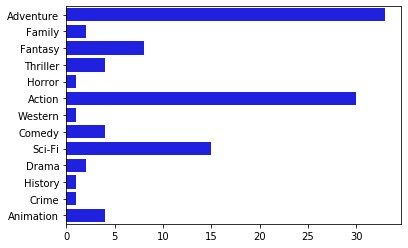

In [50]:
#create a barplot using Seaborn using keys and values variables

sns.barplot(y = keys, x = values, color = 'blue')